# Algotytm przecinania się odcinków na płaszczyźnie

In [1]:
# Module handling
import os
import sys
module_path = os.path.abspath(os.path.join('..','..'))
if module_path not in sys.path:
  sys.path.append(module_path)
# Plots, visualisations and tests
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from tests.test4 import Test
from visualizer.main import Visualizer
from tkinter import Tk
from tkinter.filedialog import asksaveasfilename
import ipympl
# Util
import numpy as np
import math
import heapq
from sortedcontainers import SortedSet
import json
import os
# Typing
from dataclasses import dataclass
from typing import Optional, Literal
from enum import Enum
from __future__ import annotations

# Przydatne funkcje 

In [4]:
def draw_example_1():
    vis = Visualizer()
    line_segments = (
        (-0.5, 0.5),
        (8.5, 3.5),
        (1, 3),
        (7, 5),
        (2, 4),
        (5, 1),
        (4.5, 3),
        (6.5, 6),
        (0, 5),
        (5.5, 5.5),
    )

    vis.add_line_segment(line_segments)
    vis.show()


def draw_example_2():
    vis = Visualizer()
    line_segments = (
        (-0.5, 0.5),
        (8.5, 3.5),
        (1, 3),
        (7, 5),
        (2, 4),
        (5, 1),
        (4.5, 3),
        (6.5, 6),
        (0, 5),
        (5.5, 5.5),
    )
    points = [(4, 2), (2.5, 3.5), (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color="red")
    vis.show()


def visualise(LINES):
    vis = Visualizer()
    # POINTS = [point[i] for point in LINES for i in (0,1)]
    vis.add_line_segment(LINES)
    # vis.add_point(POINTS, color='green')
    vis.show()

### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

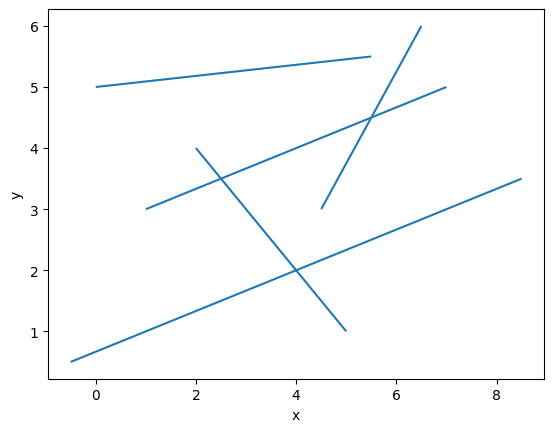

In [5]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

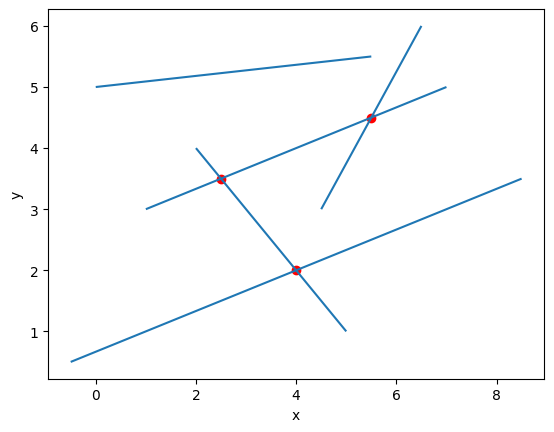

In [6]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [7]:
def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """
    
    # Probability of choosing two exactly same points or two points, which would craete vertical line is effectively 0
    random_x = np.random.uniform(0, max_x, size=n*2)
    random_y = np.random.uniform(0, max_y, size=n*2)
    pairs = list(zip(random_x,random_y))
    result = []
    for i in range(0,n*2,2):
      pair_1, pair_2 = (pairs[i][0], pairs[i][1]), (pairs[i+1][0],pairs[i+1][1])
      if(pair_1[0] < pair_2[0]):
        result.append((pair_1, pair_2))
      else:
        result.append((pair_2, pair_1))
    return result

In [8]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.031s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [9]:
A = generate_uniform_sections(1000,1000, 100)

Zwizualizuj otrzymane odcinki

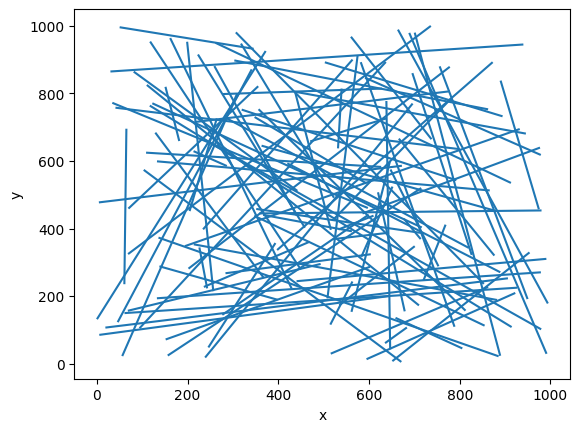

In [10]:
visualise(A)

Uzupełnij funkcję ```add_sections``` #interaktywne dodawanie odcinków przez rysowanie myszką

In [13]:

def draw_custom_segments():

  # Initialize the list to store line segments
  line_segments = []
  current_points = []
  
  #Create the figure and axis
  fig, ax = plt.subplots()

  def on_click(event):
    nonlocal current_points, line_segments

    # Check if click is within the axes
    if event.inaxes != ax: return
    
    point = (event.xdata, event.ydata)
    current_points.append(point)

    # Draw the point on the plot
    ax.plot(point[0], point[1], marker='o', color='r')
    plt.draw()

    # If two points are collected, create a line
    if len(current_points) == 2:
      line_segments.append((
        min(current_points[0], current_points[1], key=lambda x:x[0]),
        max(current_points[0],current_points[1], key=lambda x: x[0])
      ))
      
      ax.plot([current_points[0][0], current_points[1][0]],
              [current_points[0][1], current_points[1][1]],
              color='b')
      plt.draw()  #redraw
      current_points = []

  # Function to save line segments to a JSON file
  def save_to_json():
    # Use Tkinter to open a save dialog
    root = Tk()
    root.withdraw()
    save_path = asksaveasfilename(defaultextension=".json",
                                  filetypes=[("JSON files", "*.json")],
                                  title="Save Line Segments")
    root.destroy()

    if save_path:  # Check if a file was selected
      with open(save_path, 'w') as f:
        json.dump(line_segments, f, indent=4)
      print(f"Line segments saved to '{save_path}'")

  ax.set_title("Click to select points")
  ax.set_xlim(-1,1)
  ax.set_ylim(-1,1)

  # Connect the click event
  fig.canvas.mpl_connect('button_press_event', on_click)


  button_ax = plt.axes([0.8, 0.01, 0.1, 0.05])
  button = Button(button_ax, 'Save')
  button.on_clicked(lambda _: save_to_json())

  # Hack to preserve button context in notebook
  fig._button = button

  # Show the plot
  plt.show()


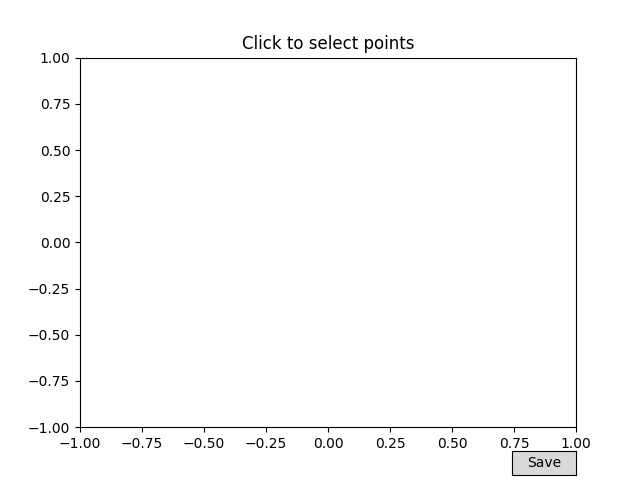

In [14]:
%matplotlib ipympl
draw_custom_segments()
%matplotlib inline

In [15]:
def read_all_line_segments():
  PATH = os.path.join('segments')
  all_line_segments = []

  # Iterate through all files in the segments directory
  for filename in os.listdir(PATH):
    if filename.endswith(".json"):
      file_path = os.path.join(PATH, filename)
      try:
        with open(file_path, 'r') as f:
          data = json.load(f)
          # Check if the data is a list of line segments
          if isinstance(data, list) and all(isinstance(segment, list) or isinstance(segment, tuple) and len(segment) == 2 for segment in data):
            all_line_segments.append(data)
      except Exception as e:
        print(f"Error reading {file_path}: {e}")

  return all_line_segments


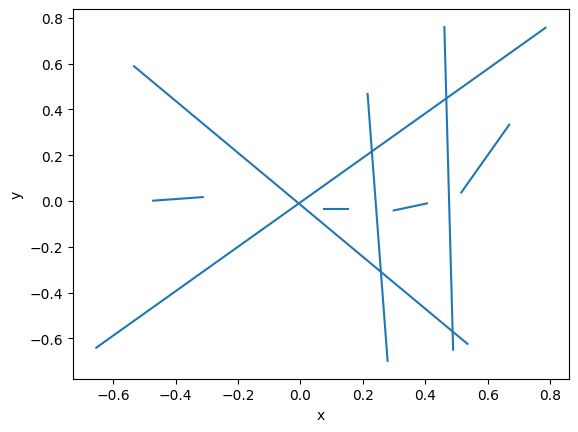

In [16]:
# Example plot
segments = read_all_line_segments()[3]
plt.close('all')
vis = Visualizer()
vis.add_line_segment(segments)
vis.show()


Uzupełnij funkcję ```is_intersection```

In [17]:
def mat_det_2x2(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    a1,a2 = a
    b1,b2 = b
    c1,c2 = c
    return (a1-c1) * (b2-c2) - (a2-c2) * (b1-c1)

In [18]:
def orient(a,b,c):
  return mat_det_2x2(a,b,c)

In [19]:
def compare(a,b,c):
  # compare b with c
  # a is the point according to which we sort
  
  EPS = 10**(-24)

  result = orient(a,b,c)
  if(abs(result) <= EPS):
    return 0
  elif(result < 0):
    return -1
  elif(result > 0):
    return 1

In [22]:
# MIOTŁA
@dataclass
class Point:
  x: float
  y: float
  
  def __eq__(self, other):
    return self.x == other.x and self.y == other.y
  
  def toTuple(self):
    return (self.x,self.y)
  

# @total_ordering
class Segment:
  # Static current x, for comparison purposes
  # Since the ordering only changes at the event points,
  # SegmentList maintains the correct tree ordering.
  x:int = 0
  
  def __init__(self, point_start: Point, point_end: Point, original_index: int):
    self.point_start= point_start
    self.point_end = point_end
    self.original_index = original_index
    self.a = (point_end.y - point_start.y) / (point_end.x - point_start.x)
    self.b = point_start.y - self.a * point_start.x
  
  def __eq__(self, other: Segment):
    if(other == None): return False
    return self.point_start == other.point_start and self.point_end == other.point_end

  def __lt__(self, other: Segment):
    if(other == None): return False
    return self.a*Segment.x+self.b<other.a*Segment.x+other.b
    
  def __hash__(self):
    return hash((self.point_start.toTuple(), self.point_end.toTuple()))
  
  def __str__(self):
    return f'({self.point_start.x}, {self.point_start.y}) | ({self.point_end.x}, {self.point_end.y}) | a={self.a} | b={self.b}'
  
  def __repr__(self):
    return f'({self.point_start.x}, {self.point_start.y}) | ({self.point_end.x}, {self.point_end.y}) | a={self.a} | b={self.b}'

class SegmentList:
  def __init__(self):
    self.segmentList = SortedSet()
  
  def insert(self, s: Segment):
    self.segmentList.add(s)
  
  def remove(self, s:Segment):
    self.segmentList.remove(s)
  
  def get_previous_and_following_segment(self, s: Segment):
    i = self.segmentList.index(s)
    prev = self.segmentList[i-1] if i > 0 else None
    next = self.segmentList[i+1] if i+1 < len(self.segmentList) else None
    return prev, next
  
  def set_x(self, x: int):
    Segment.x = x


In [20]:
def check_for_intersect(s1: Segment, s2: Segment):
  s1_point_start = s1.point_start.toTuple()
  s1_point_end = s1.point_end.toTuple()
  s2_point_start = s2.point_start.toTuple()
  s2_point_end = s2.point_end.toTuple()
  
  return (
    compare(s1_point_start, s1_point_end, s2_point_start) != compare(s1_point_start, s1_point_end, s2_point_end )
    and
    compare(s2_point_start,s2_point_end,s1_point_start) != compare(s2_point_start, s2_point_end, s1_point_end)
  )

  

In [23]:
# KOLEJKA ZDARZEŃ
class EventType(Enum):
  START = 0
  END = 1
  CROSS = 2

@dataclass
class Event:
  x: float
  type: Literal[EventType.START, EventType.END, EventType.CROSS]
  segment: int
  segment_intersecting: Optional[int] = None
  
  def __eq__(self, other):
    if(other == None): return False
    return math.isclose(self.x,other.x) and self.segment == other.segment and self.segment_intersecting == other.segment_intersecting

  def __lt__(self, other):
    if(other == None): return False
    return self.x < other.x
  
  def __hash__(self):
    return hash((self.x))
  
class EventQueue:
  def __init__(self):
    self.Q = []
    
  def __len__(self):
    return len(self.Q)
  
  def put(self, e: Event):
    heapq.heappush(self.Q, e)
  
  def pop(self):
    return heapq.heappop(self.Q)
  
  def peek(self):
    return self.Q[0]
  
  def add_if_intersect(self, s1: Optional[Segment], s2: Optional[Segment], TESTED: set):
    if(s1 != None and s2 != None):
      segment_tuple = (min(s1.original_index,s2.original_index),max(s1.original_index, s2.original_index))
      if(check_for_intersect(s1,s2) and segment_tuple not in TESTED):
        self.put(Event((s2.b - s1.b)/(s1.a-s2.a), type=EventType.CROSS, segment=s1.original_index, segment_intersecting=s2.original_index))
      TESTED.add(segment_tuple)
  
  
  def check_for_segments_intersection(self, s1, s2):
    if(s1 != None and s2 != None and check_for_intersect(s1,s2)):
      return True
    return False

In [24]:
def is_intersection(sections):
  """
  Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina 
  :param sections: tablica odcinków w postaci krotek krotek współrzędnych punktów końcowych odcinków
  :param eps: epsilon będący dokładnością, z jaką porównujemy liczby zmiennoprzecinkowe
  :return: True / False
  """
  
  # Create list of segments from input
  S = [Segment(Point(x1,y1),Point(x2,y2), original_index=i) for i, [(x1,y1), (x2,y2)] in enumerate(sections)]
  # Create a mapping original_index -> segment reference
  S_Map = {segment.original_index: segment for segment in S } 
  # Create and fill the event queue
  EQ = EventQueue()
  for s in S:
    EQ.put(Event(s.point_start.x, type=EventType.START, segment=s.original_index))
    EQ.put(Event(s.point_end.x, type=EventType.END, segment=s.original_index))
  # Create empty Segment List (AVLTree)
  SL = SegmentList()
  # Intersection finding
  while(len(EQ) > 0):
    # Get the event from queue
    e: Event = EQ.pop()
    
    if(e.type == EventType.START):
      # Update the x coordinate to insert the segment correctly
      SL.set_x(e.x)
      s_index = e.segment
      s = S_Map[s_index]
      
      # Insert into the active Segment List
      SL.insert(s)
      
      # Fetch previous element and next element if they exist, None otherwise
      next: Segment; prev: Segment
      prev, next = SL.get_previous_and_following_segment(s)
      
      # Return True if crossing was found
      if(EQ.check_for_segments_intersection(s,prev) or EQ.check_for_segments_intersection(s,next)):
        return True
      
      
    elif(e.type == EventType.END):
      # No need to update x coordinate here, as we are only deleting an item
      # Even when fetching prev and next it does not matter, because order did not change,
      # because there was no intersection since last x coordinate update
      s_index = e.segment
      s = S_Map[s_index]
      
      # Fetch prev and next
      next: Segment; prev: Segment
      prev, next = SL.get_previous_and_following_segment(s)
      
      # Return True if crossing was found
      if(EQ.check_for_segments_intersection(prev,next)):
        return True
      
      # Remove from active Segment List
      SL.remove(s)
      
  # Return false if main loop did not find any intersections
  return False
    

In [25]:
Test().runtest(2, is_intersection)

Lab 4, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.000s


### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

Uzupełnij funkcję ```is_intersection_with_visualization```

In [26]:
def add_segment_to_vis(vis: Visualizer, segment: Segment, color: str):
  return vis.add_line_segment((segment.point_start.toTuple(), segment.point_end.toTuple()),color=color)

In [27]:
def get_intersection_point(s1: Segment,s2: Segment):
  x = (s2.b - s1.b)/(s1.a-s2.a)
  return Point(x, s1.a * x + s1.b )

In [28]:
def add_point_to_vis(vis: Visualizer, point: Point, color: str):
  return vis.add_point(point.toTuple(), color=color)

In [29]:
def add_vertical_line(vis: Visualizer,point: Point):
  point = point.toTuple()
  return vis.add_line((point, np.add(point,(0,1))), color='red')

In [30]:
def is_intersection_with_visualization(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: True / False
    """
    vis = Visualizer()
    vis.add_line_segment(sections, color='blue')
    
    
    # Create list of segments from input
    S = [Segment(Point(x1,y1),Point(x2,y2), original_index=i) for i, [(x1,y1), (x2,y2)] in enumerate(sections)]
    # Create a mapping original_index -> segment reference
    S_Map = {segment.original_index: segment for segment in S } 
    S_VIS_Map = {}
    # Create and fill the event queue
    EQ = EventQueue()
    for s in S:
      EQ.put(Event(s.point_start.x, type=EventType.START, segment=s.original_index))
      EQ.put(Event(s.point_end.x, type=EventType.END, segment=s.original_index))
    # Create empty Segment List (AVLTree)
    SL = SegmentList()
    # Intersection finding
    while(len(EQ) > 0):
      # Get the event from queue
      e: Event = EQ.pop()
      current_line = None
      if(e.type == EventType.START):
        add_point_to_vis(vis, S_Map[e.segment].point_start, 'red')
        current_line = add_vertical_line(vis, S_Map[e.segment].point_start)
      elif(e.type == EventType.END):
        add_point_to_vis(vis, S_Map[e.segment].point_end, 'red')
        current_line = add_vertical_line(vis, S_Map[e.segment].point_end)
      
      if(e.type == EventType.START):
        # Update the x coordinate to insert the segment correctly
        SL.set_x(e.x)
        s_index = e.segment
        s = S_Map[s_index]
        
        # Insert into the active Segment List
        
        current_segment = add_segment_to_vis(vis,s, color='red')
        SL.insert(s)
        
        # Fetch previous element and next element if they exist, None otherwise
        next: Segment; prev: Segment
        prev, next = SL.get_previous_and_following_segment(s)
        
        # Return True if crossing was found
        check_1, check_2 = None, None
        if(prev):
          check_1 = add_segment_to_vis(vis,prev, color='green')
          if(EQ.check_for_segments_intersection(s,prev)):
            add_point_to_vis(vis,get_intersection_point(s,prev), 'green')
            vis.show_gif()
            return vis
        if(next):
          check_2 = add_segment_to_vis(vis,next, color='green')
          if(EQ.check_for_segments_intersection(s,next)):
            add_point_to_vis(vis,get_intersection_point(s,next), 'green')
            vis.show_gif()
            return vis
        check_1 and vis.remove_figure(check_1)
        check_2 and vis.remove_figure(check_2)
        vis.remove_figure(current_segment)
        
        
      elif(e.type == EventType.END):
        # No need to update x coordinate here, as we are only deleting an item
        # Even when fetching prev and next it does not matter, because order did not change,
        # because there was no intersection since last x coordinate update
        SL.set_x(e.x)
        s_index = e.segment
        s = S_Map[s_index]
        
        # Fetch prev and next
        next: Segment; prev: Segment
        prev, next = SL.get_previous_and_following_segment(s)
        
        check_1, check_2 = None, None
        if(prev and next):
          check_1 = add_segment_to_vis(vis,prev, color='green')
          check_2 = add_segment_to_vis(vis,next, color='green')
          if(EQ.check_for_segments_intersection(prev,next)):
            add_point_to_vis(vis,get_intersection_point(prev,next),'green')
            vis.show_gif()
            return vis
        check_1 and vis.remove_figure(check_1)
        check_2 and vis.remove_figure(check_2)
        
        # Remove from active Segment List
        # vis.remove_figure(S_VIS_Map[e.segment])
        # del S_VIS_Map[e.segment]
        SL.remove(s)
      vis.remove_figure(current_line)
      current_line = None    
    # Return false if main loop did not find any intersections
    
    return vis
  

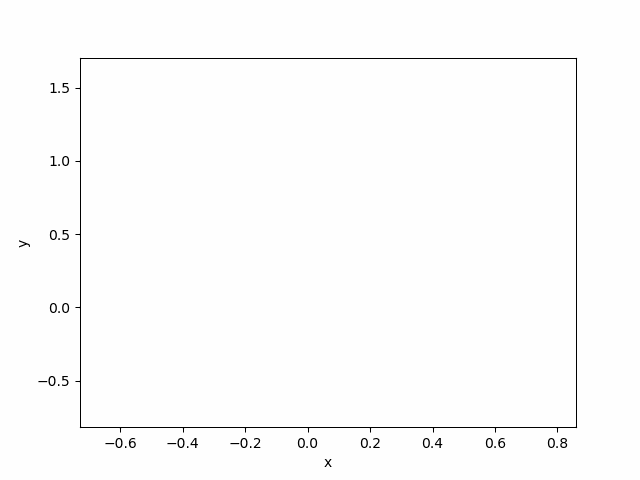

In [30]:
vis = is_intersection_with_visualization(segments)
vis.show_gif()

Uzupełnij funkcję ```find_intersections```

In [31]:

def find_intersections(sections):
  """
  Funkcja znajduje wszystkie przecięcia zadanych odcinków
  :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
  :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
  [((x1, y1), id1,id2),
  ((x2, y2), id3, id4),
  ...]
  """
  
  # Create empty result list
  RESULT = []
  # Set epsilon, which will be used during crossing segments swapping
  EPS = 1e-9
  # Create list of segments from input
  S = [Segment(Point(x1,y1),Point(x2,y2), original_index=i) for i, [(x1,y1), (x2,y2)] in enumerate(sections)]
  # Create a mapping original_index -> segment reference
  S_Map = {segment.original_index: segment for segment in S } 
  # Create and fill the event queue
  EQ = EventQueue()
  # Create set for determining, which segments have already been tested
  TESTED = set()
  
  for s in S:
    EQ.put(Event(s.point_start.x, type=EventType.START, segment=s.original_index))
    EQ.put(Event(s.point_end.x, type=EventType.END, segment=s.original_index))
  # Create empty Segment List (AVLTree)
  SL = SegmentList()
  
  # Intersection finding
  while(len(EQ) > 0):
    # Get the event from queue
    e: Event = EQ.pop()
    
    if(e.type == EventType.START):
      # Update the x coordinate to insert the segment correctly
      SL.set_x(e.x)
      s_index = e.segment
      s = S_Map[s_index]
      
      # Insert into the active Segment List
      SL.insert(s)
      
      # Fetch previous element and next element if they exist, None otherwise
      next: Segment; prev: Segment
      prev, next = SL.get_previous_and_following_segment(s)
      
      # Add CROSS events to event queue if corssings were found
      EQ.add_if_intersect(prev,s, TESTED)
      EQ.add_if_intersect(s,next, TESTED)
      
    elif(e.type == EventType.END):
      # No need to update x coordinate here, as we are only deleting an item
      # Even when fetching prev and next it does not matter, because order did not change,
      # because there was no intersection since last x coordinate update
      s_index = e.segment
      s = S_Map[s_index]
      # Fetch prev and next
      next: Segment; prev: Segment
      prev, next = SL.get_previous_and_following_segment(s)
      # Check for intersection of these segments
      EQ.add_if_intersect(prev, next, TESTED)
      
      # Remove from active Segment List
      SL.remove(s)
      

    elif(e.type == EventType.CROSS):
      
      # Get both of the crossing segments from the event object and map
      s_i, s_j = e.segment, e.segment_intersecting
      segment, segment_intersecting = S_Map[s_i], S_Map[s_j]
      cross_point = Point(e.x, segment.a * e.x + segment.b)
      
      # Add cross point to the result (indices start from 1 in tests, that why +1)
      RESULT.append((cross_point.toTuple(), segment.original_index+1, segment_intersecting.original_index+1))
      
      next1: Segment; prev1: Segment
      next2: Segment; prev2: Segment
      prev1, next1 = SL.get_previous_and_following_segment(segment)
      prev2, next2 = SL.get_previous_and_following_segment(segment_intersecting)
      
      segment_neighbour = prev1 if prev1 != segment_intersecting else next1
      segment_intersecting_neighbour = prev2 if prev2 != segment else next2
      
      # Remove both of intersecting segments, because we wish for their ordering to change
      # We may not update x coordinate here, because our structure would make inproper
      # assumptions about ordering of the elements.
      SL.remove(segment)
      SL.remove(segment_intersecting)
      
      # Calculate and set new x
      new_x = e.x + EPS
      SL.set_x(new_x)
      
      # Create two new segments which start after the intersection and replace the old ones to avoid incorrectly assuming they cross again
      new_segment = Segment(Point(new_x, segment.a * new_x + segment.b), segment.point_end, s_i)
      new_segment_intersecting = Segment(Point(new_x, segment_intersecting.a * new_x + segment_intersecting.b), segment_intersecting.point_end, s_j)
      S_Map[s_i] = new_segment
      S_Map[s_j] = new_segment_intersecting
      
      # Insert both segments
      SL.insert(new_segment)
      SL.insert(new_segment_intersecting)
      
      # Check if the segments intersect with their new neighbours and if so,
      # add corresponding event to EventQueue
      EQ.add_if_intersect(new_segment, segment_intersecting_neighbour, TESTED) 
      EQ.add_if_intersect(new_segment_intersecting, segment_neighbour, TESTED) 
  
  return RESULT

In [32]:
Test().runtest(3, find_intersections)

Lab 4, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.000s


Uzupełnij funkcję ```find_intersections_with_visualization```

In [33]:

def find_intersections_with_visualization(sections):
  """
  Funkcja znajduje wszystkie przecięcia zadanych odcinków
  :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
  :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
  [((x1, y1), id1,id2),
  ((x2, y2), id3, id4),
  ...]
  """
  
  vis = Visualizer()
  vis.add_line_segment(sections, color='blue')
  
  # Create empty result list
  RESULT = []
  # Set epsilon, which will be used during crossing segments swapping
  EPS = 1e-9
  # Create list of segments from input
  S = [Segment(Point(x1,y1),Point(x2,y2), original_index=i) for i, [(x1,y1), (x2,y2)] in enumerate(sections)]
  # Create a mapping original_index -> segment reference
  S_Map = {segment.original_index: segment for segment in S } 
  # Create and fill the event queue
  EQ = EventQueue()
  # Create set for determining, which segments have already been tested
  TESTED = set()
  
  for s in S:
    EQ.put(Event(s.point_start.x, type=EventType.START, segment=s.original_index))
    EQ.put(Event(s.point_end.x, type=EventType.END, segment=s.original_index))
  # Create empty Segment List (AVLTree)
  SL = SegmentList()
  
  # Intersection finding
  while(len(EQ) > 0):
    # Get the event from queue
    e: Event = EQ.pop()
    current_line = None
    
    if(e.type == EventType.START):
      add_point_to_vis(vis, S_Map[e.segment].point_start, 'red')
      current_line = add_vertical_line(vis, S_Map[e.segment].point_start)
      
    elif(e.type == EventType.END):
      add_point_to_vis(vis, S_Map[e.segment].point_end, 'red')
      current_line = add_vertical_line(vis, S_Map[e.segment].point_end)
    elif(e.type == EventType.CROSS):
      intersection_point = get_intersection_point(S_Map[e.segment],S_Map[e.segment_intersecting])
      add_point_to_vis(vis,intersection_point,'red')
      current_line = add_vertical_line(vis, intersection_point)
    
    if(e.type == EventType.START):
      # Update the x coordinate to insert the segment correctly
      SL.set_x(e.x)
      s_index = e.segment
      s = S_Map[s_index]
      
      # Insert into the active Segment List
      current_segment = add_segment_to_vis(vis,s, color='red')
      SL.insert(s)
      
      # Fetch previous element and next element if they exist, None otherwise
      next: Segment; prev: Segment
      prev, next = SL.get_previous_and_following_segment(s)
      
      # Add CROSS events to event queue if corssings were found
      check_1, check_2 = None, None
      if(prev):
        check_1 = add_segment_to_vis(vis,prev, color='green')
        if(EQ.check_for_segments_intersection(s,prev)):
          temp = add_point_to_vis(vis,get_intersection_point(s,prev), 'green')
          vis.remove_figure(temp)
          EQ.add_if_intersect(s, prev, TESTED)
      if(next):
        check_2 = add_segment_to_vis(vis,next, color='green')
        if(EQ.check_for_segments_intersection(s,next)):
          temp = add_point_to_vis(vis,get_intersection_point(s,next), 'green')
          vis.remove_figure(temp)
          EQ.add_if_intersect(s, next, TESTED)
      check_1 and vis.remove_figure(check_1)
      check_2 and vis.remove_figure(check_2)
      vis.remove_figure(current_segment)

      
    elif(e.type == EventType.END):
      # No need to update x coordinate here, as we are only deleting an item
      # Even when fetching prev and next it does not matter, because order did not change,
      # because there was no intersection since last x coordinate update
      s_index = e.segment
      s = S_Map[s_index]
      # Fetch prev and next
      next: Segment; prev: Segment
      prev, next = SL.get_previous_and_following_segment(s)
      # Check for intersection of these segments
      check_1, check_2 = None, None
      if(prev and next):
        check_1 = add_segment_to_vis(vis,prev, color='green')
        check_2 = add_segment_to_vis(vis,next, color='green')
        if(EQ.check_for_segments_intersection(prev,next)):
          test = add_point_to_vis(vis,get_intersection_point(prev,next),'green')
          vis.remove_figure(test)
          EQ.add_if_intersect(prev,next,TESTED)
        check_1 and vis.remove_figure(check_1)
        check_2 and vis.remove_figure(check_2)
      
      # Remove from active Segment List
      SL.remove(s)

    elif(e.type == EventType.CROSS):
      
      # Get both of the crossing segments from the event object and map
      s_i, s_j = e.segment, e.segment_intersecting
      segment, segment_intersecting = S_Map[s_i], S_Map[s_j]
      cross_point = Point(e.x, segment.a * e.x + segment.b)
      
      # Add cross point to the result (indices start from 1 in tests, that why +1)
      RESULT.append((cross_point.toTuple(), segment.original_index+1, segment_intersecting.original_index+1))
      
      next1: Segment; prev1: Segment
      next2: Segment; prev2: Segment
      prev1, next1 = SL.get_previous_and_following_segment(segment)
      prev2, next2 = SL.get_previous_and_following_segment(segment_intersecting)
      
      segment_neighbour = prev1 if prev1 != segment_intersecting else next1
      segment_intersecting_neighbour = prev2 if prev2 != segment else next2
      
      # Remove both of intersecting segments, because we wish for their ordering to change
      # We may not update x coordinate here, because our structure would make inproper
      # assumptions about ordering of the elements.
      SL.remove(segment)
      SL.remove(segment_intersecting)
      
      # Calculate and set new x
      new_x = e.x + EPS
      SL.set_x(new_x)
      
      # Create two new segments which start after the intersection and replace the old ones to avoid incorrectly assuming they cross again
      new_segment = Segment(Point(new_x, segment.a * new_x + segment.b), segment.point_end, s_i)
      new_segment_intersecting = Segment(Point(new_x, segment_intersecting.a * new_x + segment_intersecting.b), segment_intersecting.point_end, s_j)
      S_Map[s_i] = new_segment
      S_Map[s_j] = new_segment_intersecting
      
      add_segment_to_vis(vis,new_segment,'blue')
      add_segment_to_vis(vis,new_segment_intersecting,'blue')
      
      # Insert both segments
      SL.insert(new_segment)
      SL.insert(new_segment_intersecting)
      
      # Check if the segments intersect with their new neighbours and if so,
      # add corresponding event to EventQueue
      
      check_1,check_2 = None, None
      if(segment_intersecting_neighbour ):
        check_1 = add_segment_to_vis(vis,segment_intersecting_neighbour, color='green')
        if(EQ.check_for_segments_intersection(segment_intersecting_neighbour, new_segment)):
          temp = add_point_to_vis(vis,get_intersection_point(segment_intersecting_neighbour,new_segment),'green')
          vis.remove_figure(temp)
          EQ.add_if_intersect(new_segment, segment_intersecting_neighbour, TESTED)
      if(segment_neighbour):
        check_2 = add_segment_to_vis(vis,segment_neighbour, color='green')
        if(EQ.check_for_segments_intersection(segment_neighbour,new_segment_intersecting)):
          temp = add_point_to_vis(vis,get_intersection_point(new_segment_intersecting,segment_neighbour),'green')
          vis.remove_figure(temp)
          EQ.add_if_intersect(new_segment_intersecting, segment_neighbour, TESTED) 
      check_1 and vis.remove_figure(check_1)
      check_2 and vis.remove_figure(check_2)
    vis.remove_figure(current_line)
    current_line = None
      
  return vis

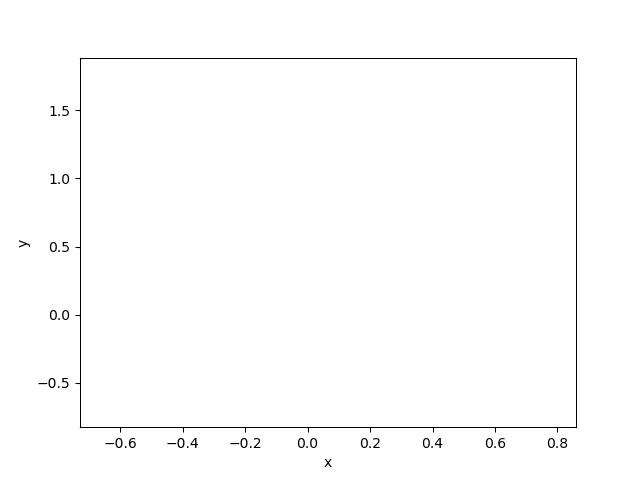

In [34]:

vis = find_intersections_with_visualization(segments)
vis.show_gif()

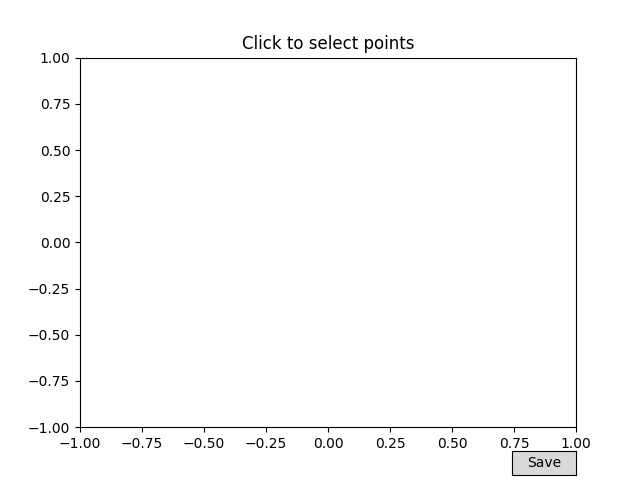

In [35]:
%matplotlib ipympl
draw_custom_segments()
%matplotlib inline


In [36]:
# Cleanup
plt.close('all')

In [37]:
def load_all_segments():
  vis = Visualizer()
  segments = read_all_line_segments()
  for segment_list in segments:
    points = [x[0] for x in find_intersections(segment_list)]
    print(points)
    vis.add_line_segment(segment_list)
    vis.add_point(points, color='red')
    vis.show()
    vis.clear()

In [38]:
def save_gifs():
  segments = read_all_line_segments()
  for i,segment_list in enumerate(segments):
    vis: Visualizer = find_intersections_with_visualization(segment_list)
    vis.save_gif(os.path.join('gif',f'segment_{i}'))

In [38]:
save_gifs()

[(-0.4521697219664562, -0.6341867490931039), (-0.3243884880715635, -0.38528912017456474), (-0.21939658864107164, -0.18078150957034722), (-0.017232283264437095, 0.21300257535715778), (0.10233668061820847, 0.44590400145480025), (0.20412153356947815, 0.6441647928651559)]
[(-0.6294755136636913, 0.356645898521996), (-0.6116343420770837, -0.6168191608004037), (-0.5987929068366967, 0.44074964533707917), (-0.5288853912004127, -0.6858744532123078), (-0.5105311328808498, 0.6826829964401466), (-0.4759792367196803, -0.5160741638825992), (-0.47003960812571194, -0.3131209739011266), (-0.45854770504462916, -0.7445723512956748), (-0.379074699809879, -0.5725583773159655), (-0.3708205987039768, -0.03808765419259108), (-0.3487593021345492, 0.21712044465950717), (-0.3388536543139622, -0.41423710924009766), (-0.3164982124558745, 0.11249302899886993), (-0.3008437028067322, -0.6181580620442853), (-0.28939753013046227, 0.1876156357429336), (-0.27898077379315644, -0.009181492493855692), (-0.2539453236267946, 0

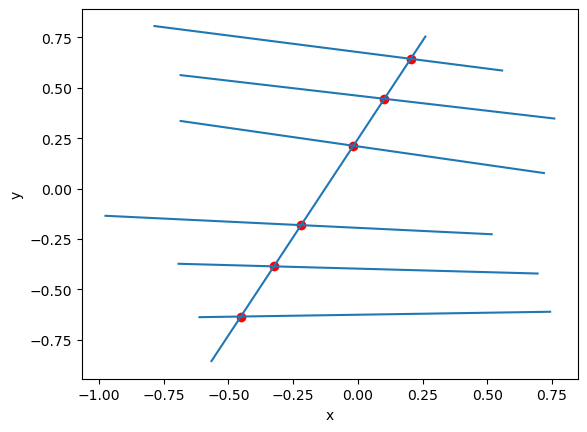

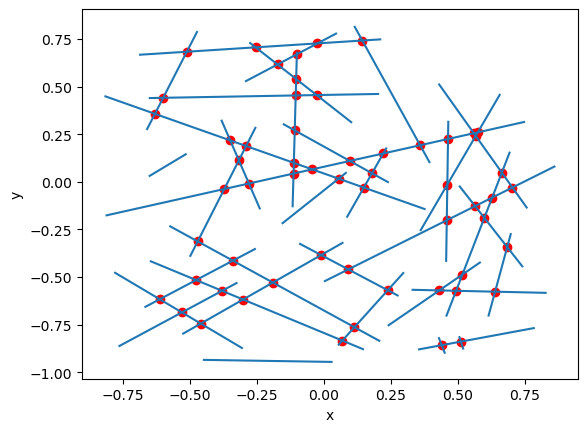

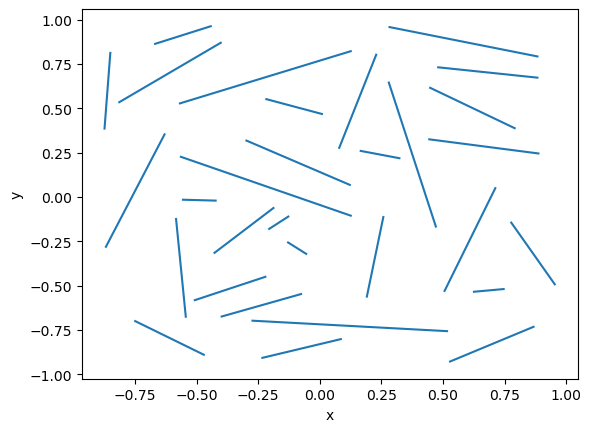

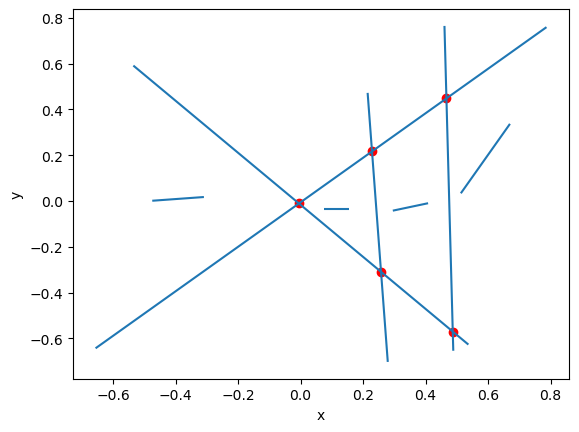

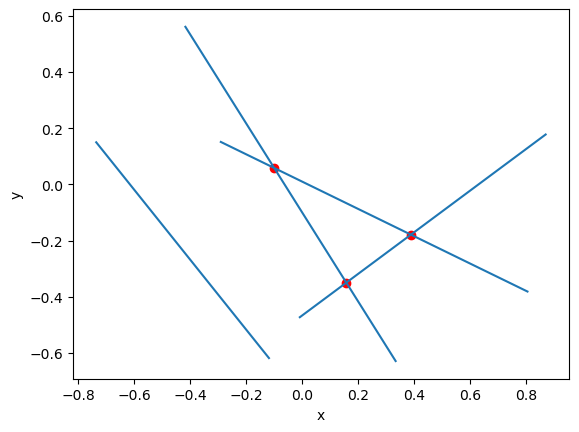

In [39]:
load_all_segments()